In [255]:
# All import statements
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score
from sklearn import svm
from scipy import stats
import scipy.stats as sta
from scipy.stats import norm
from scipy.special import expit
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()


In [219]:
# Filepath and read
churn_data_path = 'C:/Users/Chad/Downloads/TelcoCustomerChurnCopy.csv'
churn_data = pd.read_csv(churn_data_path)


In [220]:
# Check data
churn_data


,customerID,OneMale,YesSenior,YesPartner,YesDependents,Tenure,YesPhoneService,YesInternetService,YesDSL,YesFiberOptic,...,ContractOneYear,ContractTwoYear,YesPaperlessBilling,YesElectronicCheck,YesMailedCheck,YesBankTransfer,YesCreditCard,MonthlyCharges,TotalCharges,YesChurn
0,7590-VHVEG,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,29.85,29.85,0.0
1,5575-GNVDE,1.0,0.0,0.0,0.0,34.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,56.95,1889.50,0.0
2,3668-QPYBK,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,53.85,108.15,1.0
3,7795-CFOCW,1.0,0.0,0.0,0.0,45.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,42.30,1840.75,0.0
4,9237-HQITU,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,84.80,1990.50,0.0
7039,2234-XADUH,0.0,0.0,1.0,1.0,72.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,103.20,7362.90,0.0
7040,4801-JZAZL,0.0,0.0,1.0,1.0,11.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,29.60,346.45,0.0
7041,8361-LTMKD,1.0,1.0,1.0,0.0,4.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,74.40,306.60,1.0


In [221]:
# Check data
churn_data.columns[1:-1]


Index(['OneMale', 'YesSenior', 'YesPartner', 'YesDependents', 'Tenure',
       'YesPhoneService', 'YesInternetService', 'YesDSL', 'YesFiberOptic',
       'YesMultiLines', 'YesOnlineSecurity', 'YesOnlineBackup',
       'YesDeviceProtection', 'YesTechSupport', 'YesStreamingTV',
       'YesStreamingMovies', 'ContractMonthly', 'ContractOneYear',
       'ContractTwoYear', 'YesPaperlessBilling', 'YesElectronicCheck',
       'YesMailedCheck', 'YesBankTransfer', 'YesCreditCard', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [222]:
# Assign variables
y = churn_data.YesChurn
churn_features = churn_data.columns[1:-1]
X = churn_data[churn_features]



In [223]:
# Xy copy to protect original data
X_copy = X.copy()
X_copy = X_copy.fillna(X_copy.mean())
y_copy = y.copy()


In [224]:
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7043 non-null   object 
 1   OneMale              7043 non-null   float64
 2   YesSenior            7043 non-null   float64
 3   YesPartner           7043 non-null   float64
 4   YesDependents        7043 non-null   float64
 5   Tenure               7043 non-null   float64
 6   YesPhoneService      7043 non-null   float64
 7   YesInternetService   7043 non-null   float64
 8   YesDSL               7043 non-null   float64
 9   YesFiberOptic        7043 non-null   float64
 10  YesMultiLines        7043 non-null   float64
 11  YesOnlineSecurity    7043 non-null   float64
 12  YesOnlineBackup      7043 non-null   float64
 13  YesDeviceProtection  7043 non-null   float64
 14  YesTechSupport       7043 non-null   float64
 15  YesStreamingTV       7043 non-null   f

In [225]:
cross = pd.crosstab(y_copy, X_copy.YesOnlineSecurity)
print(cross)

oddsratio, pvalue = sta.fisher_exact(cross)
print(pvalue)



YesOnlineSecurity   0.0   1.0
YesChurn                     
0.0                3450  1724
1.0                1574   295
2.166690861357232e-50


In [226]:
# Fit model
churn_model = DecisionTreeRegressor(max_leaf_nodes = 500, random_state=1)
churn_model.fit(X_copy,y_copy)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=500,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [227]:
print("churn predictions for head")
print(X_copy.head())
print(churn_model.predict(X_copy))


churn predictions for head
   OneMale  YesSenior  YesPartner  YesDependents  Tenure  YesPhoneService  \
0      0.0        0.0         1.0            0.0     1.0              0.0   
1      1.0        0.0         0.0            0.0    34.0              1.0   
2      1.0        0.0         0.0            0.0     2.0              1.0   
3      1.0        0.0         0.0            0.0    45.0              0.0   
4      0.0        0.0         0.0            0.0     2.0              1.0   

   YesInternetService  YesDSL  YesFiberOptic  YesMultiLines  ...  \
0                 1.0     1.0            0.0            0.0  ...   
1                 1.0     1.0            0.0            0.0  ...   
2                 1.0     1.0            0.0            0.0  ...   
3                 1.0     1.0            0.0            0.0  ...   
4                 1.0     0.0            1.0            0.0  ...   

   ContractMonthly  ContractOneYear  ContractTwoYear  YesPaperlessBilling  \
0              1.0      

In [228]:
predicted_churn = churn_model.predict(X_copy)
mean_absolute_error(y, predicted_churn)

0.1324096370088838

In [229]:
train_X, val_X, train_y, val_y = train_test_split(X_copy, y_copy, random_state = 0)
churn_model.fit(train_X, train_y)
val_predictions = churn_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

0.2665436698878454


The accuracy score of the confusion matrix is:  0.7535491198182851
[[1111  187]
 [ 247  216]]


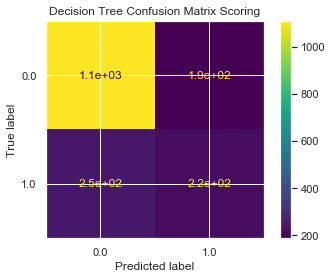

In [260]:
train_X2, val_X2, train_y2, val_y2 = train_test_split(X_copy, y_copy, random_state = 0)
confusion_model = DecisionTreeClassifier(max_leaf_nodes = 500, random_state=1)
confusion_model.fit(train_X2, train_y2)
confusion_preds = confusion_model.predict(val_X2)
#classifier = svm.SVC(kernel='linear', C=0.01).fit(train_X2, train_y2)
#conf_preds = []
#for i in confusion_preds:
  #  if i >= 0.5:
   #     conf_preds.append(1)
   # else:
        #conf_preds.append(0)
#print(confusion_matrix(val_y2, confusion_preds))
print("The accuracy score of the confusion matrix is: ",accuracy_score(val_y2, confusion_preds))
disp = plot_confusion_matrix(confusion_model, val_X2, val_y2)
disp.ax_.set_title("Decision Tree Confusion Matrix Scoring")
print(disp.confusion_matrix)
#print(conf_preds)

In [231]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(float(mae))

temp = get_mae(10,  train_X, val_X, train_y, val_y)
print(temp)

0.2832989383715324


In [232]:
X3 = sm.add_constant(train_X)
inf_stats = sm.OLS(train_y, X3)
fii = inf_stats.fit()
print(fii.summary2())


                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.293    
Dependent Variable:  YesChurn         AIC:                4558.1586
Date:                2020-02-08 05:46 BIC:                4715.8880
No. Observations:    5282             Log-Likelihood:     -2255.1  
Df Model:            23               F-statistic:        96.11    
Df Residuals:        5258             Prob (F-statistic): 0.00     
R-squared:           0.296            Scale:              0.13815  
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const                0.1204   0.0190  6.3411 0.0000  0.0832  0.1576
OneMale             -0.0108   0.0102 -1.0529 0.2924 -0.0309  0.0093
YesSenior            0.0502   0.0150  3.3489 0.0008  0.0208  0.0797
YesPartner           0.0029   0.0124  0.2355 0.8139 -0.0213  0.027

In [233]:
#hypothesis testing

#logit_model=sm.Logit(train_y, train_X)
#result=logit_model.fit(method='nm', maxfun=12000, maxiter=10000)
X2 = sm.add_constant(train_X)
est = sm.Logit(train_y, X2)
est2 = est.fit()
print(est2.summary())
print(est2.summary2())
print(np.diag(est2.cov_params()))

#print(mean_absolute_error(val_y, result.predict(val_X)))
#print(result.summary())


Optimization terminated successfully.
         Current function value: 0.408102
         Iterations 18
                           Logit Regression Results                           
Dep. Variable:               YesChurn   No. Observations:                 5282
Model:                          Logit   Df Residuals:                     5258
Method:                           MLE   Df Model:                           23
Date:                Sat, 08 Feb 2020   Pseudo R-squ.:                  0.2957
Time:                        05:46:34   Log-Likelihood:                -2155.6
converged:                       True   LL-Null:                       -3060.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.6556   1.35e+06  -1.22e-06      1.000   -2.66e+06    2.66e+06
O

C:\Users\Chad\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Chad\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Chad\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Chad\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [234]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0.291972
Max leaf nodes: 50  		 Mean Absolute Error:  0.272549
Max leaf nodes: 500  		 Mean Absolute Error:  0.266544
Max leaf nodes: 5000  		 Mean Absolute Error:  0.271247


In [235]:
forest_model = RandomForestRegressor(random_state=2)
forest_model.fit(train_X, train_y)
churn_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, churn_preds))
#print("The score for the confusion matrix is: " + str(confusion_matrix(train_y, val_y)))
#Random forest model

0.2734095729338489


In [236]:
train_y

3296    0.0
6397    0.0
6043    1.0
5309    0.0
3000    1.0
       ... 
4931    0.0
3264    0.0
1653    0.0
2607    1.0
2732    0.0
Name: YesChurn, Length: 5282, dtype: float64

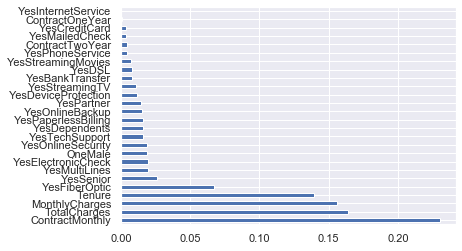

In [237]:
#churn_model.feature_importances_
feat_importances = pd.Series(churn_model.feature_importances_, index=train_X.columns)
feat_importances.nlargest(26).plot(kind='barh')


In [238]:
lin_model = LinearRegression()
lin_rfe = RFE(lin_model, 1)
lin_fit = lin_rfe.fit(train_X, train_y)
lin_model.fit(train_X, train_y)
print("Num Features: %d" % lin_fit.n_features_)
print("Selected Features: %s" % lin_fit.support_)
print("Feature Ranking: %s" % lin_fit.ranking_)
print("Y intercept is: " + str(lin_model.intercept_))
#print("coefs are: " + str(lin_model.coef_))
num = 1
for i in train_X.columns:
    print(str(lin_fit.ranking_[num - 1]) + " " + str(i) + " " + str(lin_model.coef_[num - 1]))
    num= num + 1

Num Features: 1
Selected Features: [False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False]
Feature Ranking: [18 16 24 15 22 17  3  2  1 19  9 10 14 11 13 21  8 20 23 12  7  6  5  4
 25 26]
Y intercept is: 0.19064096729866115
18 OneMale -0.010784380629809237
16 YesSenior 0.05024936442198137
24 YesPartner 0.0029105952112179843
15 YesDependents -0.0253286471120352
22 Tenure -0.0019646945565880407
17 YesPhoneService -0.08872032956364476
3 YesInternetService 0.07713949741088051
2 YesDSL -0.012712334650341522
1 YesFiberOptic 0.08985183206122202
19 YesMultiLines 0.050590312627393816
9 YesOnlineSecurity -0.057876411887455376
10 YesOnlineBackup -0.04712367012138008
14 YesDeviceProtection -0.012002159144514182
11 YesTechSupport -0.05532443858785601
13 YesStreamingTV 0.027908339494500438
21 YesStreamingMovies 0.00853165933675506
8 ContractMonthly 0.06189993015216697
20 ContractOneYear -0.052908

In [239]:
log_model = LogisticRegression(max_iter = 1000, C=1e9)
log_rfe = RFE(log_model,1)
log_fit = log_rfe.fit(train_X, train_y)
log_model.fit(train_X, train_y)
print("Num Features: %d" % log_fit.n_features_)
print("Selected Features: %s" % log_fit.support_)
print("Feature Ranking: %s" % log_fit.ranking_)
print("Y intercept is: " + str(log_model.intercept_))
#print("coef is: " + str(log_model.coef_[0,2]))
#print("coefs are: " + str(lin_model.coef_))
num = 1
for i in train_X.columns:
    print(str(log_fit.ranking_[num - 1]) + " " + str(i) + " " + str(log_model.coef_[0, num - 1]))
    num= num + 1
# most important logistc features = contractmonthly, contracttwoyear, yesfiberoptic, yesinternetservice


Num Features: 1
Selected Features: [False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False]
Feature Ranking: [17 16 24 14 22 12  5 19  3 18  6  9 23 10 15 20  1  4  2 11 21 13  8  7
 25 26]
Y intercept is: [-0.61125896]
17 OneMale -0.11918224967113687
16 YesSenior 0.3071392699219633
24 YesPartner 0.07529462845735087
14 YesDependents -0.2449979069136769
22 Tenure -0.06089983440200544
12 YesPhoneService -0.9484688867971423
5 YesInternetService 0.40396214920356244
19 YesDSL -0.04732026169280548
3 YesFiberOptic 0.4512824108914916
18 YesMultiLines 0.33139050505124185
6 YesOnlineSecurity -0.4500392636528378
9 YesOnlineBackup -0.31793277638217
23 YesDeviceProtection -0.0553406181452654
10 YesTechSupport -0.41759712268363297
15 YesStreamingTV 0.19422907489182342
20 YesStreamingMovies 0.05645319247566362
1 ContractMonthly 0.42853892079999933
4 ContractOneYear -0.36335722565796524
2 ContractTwo

In [240]:
log_model.summary2()

AttributeError: 'LogisticRegression' object has no attribute 'summary2'

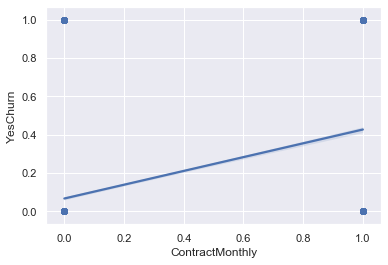

In [241]:
logistic_vars = ['ContractMonthly', 'ContractTwoYear', 'YesFiberOptic', 'YesInternetService', 'YesOnlineSecurity']

plota = sns.regplot(x="ContractMonthly" , y="YesChurn", data = churn_data)


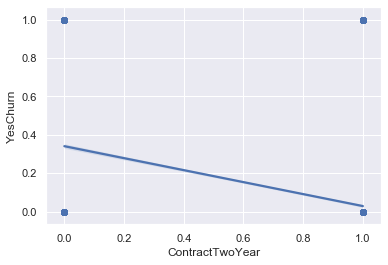

In [242]:
plotb = sns.regplot(x="ContractTwoYear" , y="YesChurn", data = churn_data)


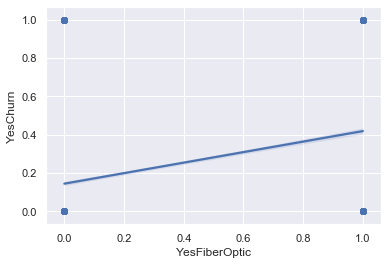

In [243]:
plotc = sns.regplot(x="YesFiberOptic" , y="YesChurn", data = churn_data)


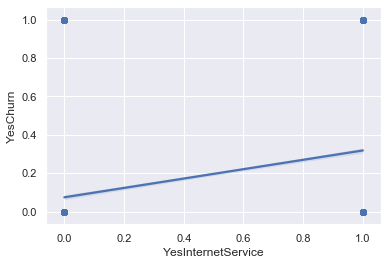

In [244]:
plotd = sns.regplot(x="YesInternetService" , y="YesChurn", data = churn_data)


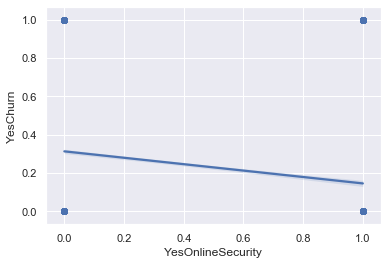

In [245]:
plote = sns.regplot(x="YesOnlineSecurity" , y="YesChurn", data = churn_data)


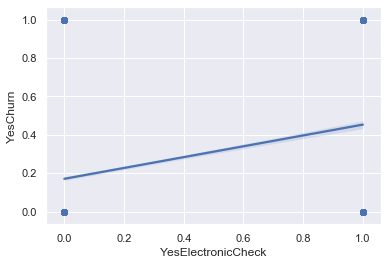

In [246]:
plotf = sns.regplot(x="YesElectronicCheck" , y="YesChurn", data = churn_data)


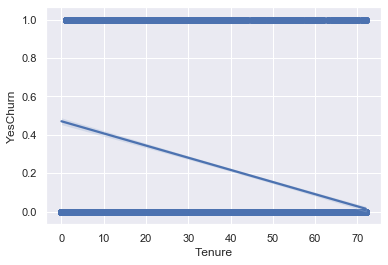

In [247]:
plotg = sns.regplot(x="Tenure" , y="YesChurn", data = churn_data)


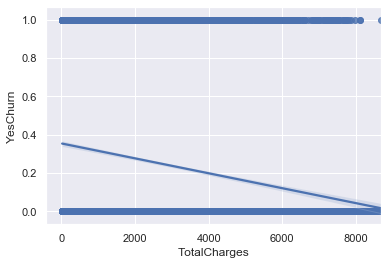

In [248]:
ploth = sns.regplot(x="TotalCharges" , y="YesChurn", data = churn_data)

In [249]:
lin_val_predictions = lin_model.predict(val_X)
print(mean_absolute_error(val_y, lin_val_predictions))
log_val_predictions = log_model.predict(val_X)
print(mean_absolute_error(val_y, log_val_predictions))

0.3013445875115026
0.2015900056785917


In [250]:
print(r2_score(val_y, log_val_predictions))

-0.04023634965905365
